## Взаимодействие сферических полостей внутри диэлектрика между обкладками плоского конденсатора

Рассмотрим две сферические полости с радиусами $a$, находящиеся внутри диэлектрика с проницаемостью $\varepsilon$ между обкладками плоского конденсатора с разностью потенциалов $U$ на расстоянии $l$ друг от друга

![Полости в конденсаторе](pics/de_condenser.png)


Дипольные моменты пузырьков противоположны тем, что получились бы при заполнении их данным диэлектриком:

 $$ \begin{array}{c}
 \mathbf{p}_п = \frac{4}{3}\pi a^3 \mathbf{P} = \frac{(\varepsilon -1)a^3\mathbf{E}}{3} \\
  \mathbf{E} = (Ud,0) \\
  p_{пx} = \frac{(\varepsilon -1)a^3Ud}{3}
  \end{array}
 $$

Так как напряженность поля, созданного диполем есть
$$ \begin{array}{c}
\mathbf{E}_d = 3(\mathbf{pr})\frac{\mathbf{r}}{r^5} - \frac{\mathbf{p}}{r^3} = E_{dx}\vec{i} + E_{dy}\vec{j} \\
E_{dx} = \frac{(\varepsilon -1)a^3x^2Ud}{\sqrt{x^2+y^2}^5} +\frac{(\varepsilon -1)a^3Ud}{3\sqrt{x^2+y^2}^3} \\
E_{dy} = \frac{(\varepsilon -1)a^3xyUd}{\sqrt{x^2+y^2}^5} \\ 
E_d = \sqrt{E_{dx}^2 + E_{dy}^2}
\end{array} $$

Визуализируем полученное поле. Положим напряжение между пластинами конденсатора $U = 1000 В$, расстояние между пластинами $d = 4 мм$, радиус пузырька $a = 0.01 мм$, проницаемость диэлектрика $\varepsilon = 6$. Пусть пузырек располагается в начале координат, а левая обкладка конденсатора соответсвует $x_l = -1 мм$

In [1]:
import numpy
import math
from matplotlib import pyplot
# отображение картинок в блокноте
# %matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
eps_0 = 8.85e-12
N = 200                     # Число узлов сетки в каждом направлении
x_start, x_end = -1.0, 3.0            # границы по x
y_start, y_end = -5.0, 5.0            # границы по y
x = numpy.linspace(x_start, x_end, N)    # одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # одномерный массив y
X, Y = numpy.meshgrid(x, y)              # создает сетку

In [3]:
eps = 6
U = 1000
d = 4e-3
a = 1e-5

Вычислим компоненты поля диполя (первого пузырька):

In [4]:
def get_field_components(radius, xs, ys, X, Y):
    """
    Returns the electric field generated by bubble inside the capacitor.
    
    Parameters
    ----------
    radius: float
        Radius of the bubble.
    xs: float
        x-coordinate of the bubble.
    ys: float
        y-coordinate of the bubble.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    E_x: 2D Numpy array of floats
        x-component of the vector field.
    E_y: 2D Numpy array of floats
        y-component of the vector field.
    """
    E_x = (eps - 1)*a**3*U*d *((X-xs)**2/((X-xs)**2+(Y-ys)**2)**2.5 + 1/3 * ((X-xs)**2+(Y-ys)**2)**-1.5)
    
    E_y = (eps - 1)*a**3*U*d * (X-xs)*(Y-ys)/((X-xs)**2+(Y-ys)**2)**2.5
    
    return E_x, E_y

In [5]:
E_dx , E_dy = get_field_components(a,0,0,X,Y)

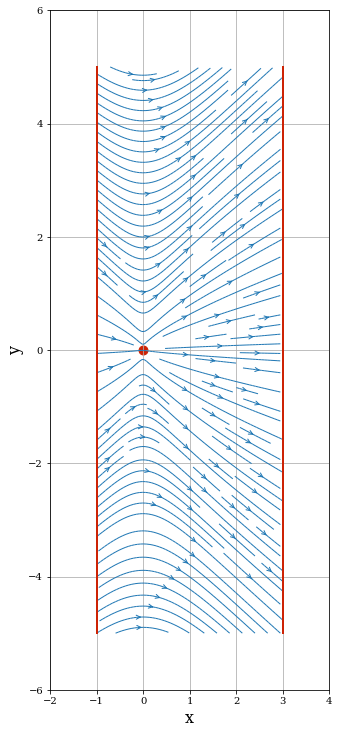

In [6]:
size = 5
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
xmax,ymax = x_start-1, x_end+1
pyplot.xlim(xmax,ymax)
ymin,ymax  = y_start-1, y_end+1
pyplot.ylim(ymin,ymax)
pyplot.streamplot(X, Y, E_dx, E_dy, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(0, 0, color='#CD2305', s=80, marker='o')
pyplot.axvline(x_start, (y_start - ymin) / (ymax -ymin),
               (y_end - ymin)/ (ymax -ymin),
color='#CD2305', linewidth=2)
pyplot.axvline(x_end, (y_start - ymin) / (ymax -ymin),
               (y_end - ymin)/ (ymax -ymin),
color='#CD2305', linewidth=2);

Определим силу взаимодействия первого пузырька со вторым. Сила взаимодействия диполей может быть вычислена как

$$F = \left(p_п \nabla\right)E_d = \frac{(\varepsilon -1)a^3Ud}{3} \frac{\partial E_d}{\partial x}$$



$E_d$ – модуль вектора напряженности поля, созданного первым пузырьком: 

$$
E_d = \sqrt{E_{dx}^2 + E_{dy}^2}
$$

ВЫчислим его:

In [7]:
E_d = numpy.sqrt(E_dx**2 + E_dy**2)

Для вычисления градиента поля воспользуемся библиотекой sympy. Нужно задать символы $x$ и $y$, записать выражение для компонент поля, а затем вычислить производную от модуля напряженности поля.

In [8]:
import sympy

In [9]:
x_,y_ = sympy.symbols('x,y')

In [10]:
E_dx_ = (x_**2/(x_**2+y_**2)**2.5 + 1/3 * (x_**2+y_**2)**-1.5)
E_dy_ = (x_*y_/(x_**2+y_**2)**2.5)

E_ = (E_dx_**2 + E_dy_**2)**0.5

Проверим, что не наделали опечаток:

In [11]:
E_

(x**2*y**2*(x**2 + y**2)**(-5.0) + (x**2*(x**2 + y**2)**(-2.5) + 0.333333333333333*(x**2 + y**2)**(-1.5))**2)**0.5

Производная $\frac{\partial E_d}{\partial x}$ получается довольно громоздкой:

In [12]:
grad_E = E_.diff(x_)
grad_E

(x**2*y**2*(x**2 + y**2)**(-5.0) + (x**2*(x**2 + y**2)**(-2.5) + 0.333333333333333*(x**2 + y**2)**(-1.5))**2)**(-0.5)*(-5.0*x**3*y**2*(x**2 + y**2)**(-6.0) + 1.0*x*y**2*(x**2 + y**2)**(-5.0) + 0.5*(x**2*(x**2 + y**2)**(-2.5) + 0.333333333333333*(x**2 + y**2)**(-1.5))*(-10.0*x**3*(x**2 + y**2)**(-3.5) + 2.0*x*(x**2 + y**2)**(-2.5)))

Теперь надо при помощи полученной функции вычислить массив значений производной на нашей сетке. Из выражения sympy в функцию полученное выражение преобразуем при помощи метода `lambdify`. Обратите внимание, что полученную функцию нужно домножить на масштабирующий множитель $(\varepsilon -1)a^3Ud$

In [13]:
dE_dx_dimless = sympy.lambdify((x_,y_),grad_E)

Все готово для вычисления силы взаимодействия!

In [16]:
def interaction_force(x_bubble,y_bubble):
    p_bubble = (eps - 1)*a**3*U*d/3
    
    dE_dx = (eps - 1)*a**3*U*d *dE_dx_dimless(x_bubble,x_bubble)
    return p_bubble*dE_dx

Предположим, что второй пузырек находится в точке с координатами $(1,2)$. Тогда на него будет действовать сила:

In [17]:
interaction_force(1,2)

-4.850712500726663e-29